# Pure radiation stars ($w=1/3$)  
  
(Some of this is probably in the literature.)

## Preamble

In [1]:
%display latex
LE = lambda latex_string: LatexExpr(latex_string);

In [2]:
from timeit import default_timer as timer
start=timer()
end=timer()

In [3]:
from mpmath import mp
from mpmath import mpf,mpc
import sage.libs.mpmath.all as a
mp.pretty = True

In [4]:
def set_precision(decimal_precision=20):
    global RealNumber,Reals,myR,sage_binary_precision,sage_decimal_precision
    mp.dps = decimal_precision
    binary_precision=mp.prec
    sage_binary_precision=binary_precision+10
    sage_decimal_precision = floor(sage_binary_precision/log(10,2))
    Reals = RealField(sage_binary_precision)
    RealNumber = Reals
    myR = Reals
    pretty_print("mp.dps = ",mp.dps,"   mp decimal precision = ", floor(mp.prec/log(10,2)),\
                        "     sage decimal precision = ", sage_decimal_precision )
set_precision(decimal_precision=20)

'mp.dps = ' 20 '   mp decimal precision = ' 21 '     sage decimal precision = ' 24

## TOV equations for a perfect fluid with constant $w$

The equation of state is 
$$
p = w \rho
$$
with $w$ constant.
Change variables:
$$
x = 4\pi  G r^2 \rho
\qquad y = \frac{Gm}{r}
$$
The TOV equations for $m$ and $p$ become
$$
r\frac{dx}{dr} = 2x
\frac{1-(2+c)y- c wx}{1-2y}
\qquad
r\frac{dy}{dr} = x-y
\qquad
c = \frac12 \left(1+\frac{1}{w}\right)
$$
The right hand sides are independent of $t$.  The TOV equations are the flow equations for a vector field in the $x$, $y$ plane.  


## The fixed point  
  
There is a fixed point at
$$
x_\infty = y_\infty = \frac{2w}{w^2+6w+1}
$$
The linearized flow near the fixed point is
$$
\begin{gathered}
x = x_\infty + \delta x
\quad
y= y_\infty + \delta y
\\[1ex]
r\frac{d}{dr}
\begin{pmatrix}
\delta x \\
\delta y
\end{pmatrix}
= - A 
\begin{pmatrix}
\delta x \\
\delta y
\end{pmatrix}
\qquad
A = 
\begin{pmatrix}
a & b\\
-1 & 1
\end{pmatrix}
\qquad
a = \frac{2w}{1+w}
\qquad
b = \frac{1+5w}{(1+w)^2}
\end{gathered}
$$
The eigenvalues of $A$ are
$$
\lambda_\pm = \frac{1+3w \pm i \sqrt{3+22w-w^2}}{2(1+w)}
$$
For $w=\frac13$
$$
A = 
\begin{pmatrix}
\frac12 & \frac32\\
-1 & 1
\end{pmatrix}
\qquad
\lambda_\pm = \frac{3 \pm i \sqrt{23}}{4}
$$
The fixed point is attractive.  The flow spirals inwards.

## Phase portrait  
  
A plot of the flowlines, followed by two blowups.  
The plot shows only direction.  The flow vector is normalized to constant length.

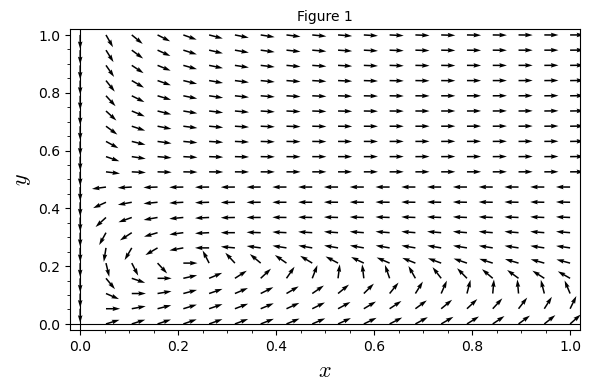

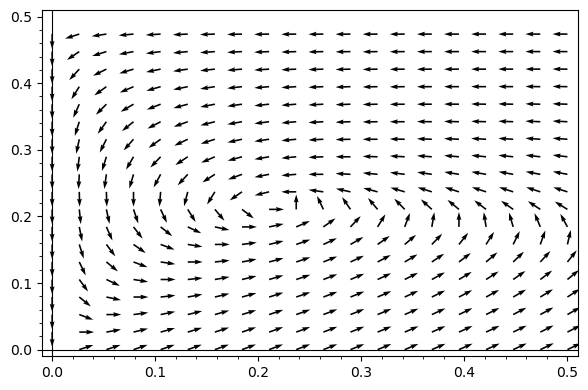

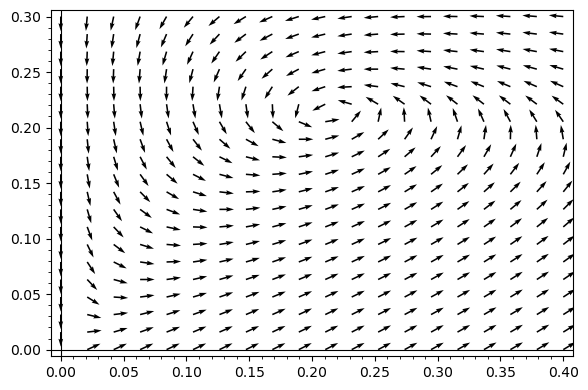

In [5]:
x,y,w = var('x,y,w')
w= 1/3
vx = x*(2-(1+1/w)*(y+w*x)/(1-2*y))
vy = x-y
vnorm = sqrt(vx^2+vy^2)
vxhat  = vx/vnorm
vyhat  = vy/vnorm
#
plt=plot_vector_field((vxhat,vyhat),(x,0,1),(y,0,1))
#plt.set_axes_range(ymin=0)
plt.axes_labels([r"$x$",r"$y$"])
show(plt,title="Figure 1")
#plt.save('Figure_1_vf.pdf',title="Figure 1", dpi=300)
#
plt=plot_vector_field((vxhat,vyhat),(x,0,.5),(y,0,.5))
show(plt)
#
vfplot=plot_vector_field((vxhat,vyhat),(x,0,0.4),(y,0,.3))
show(vfplot)

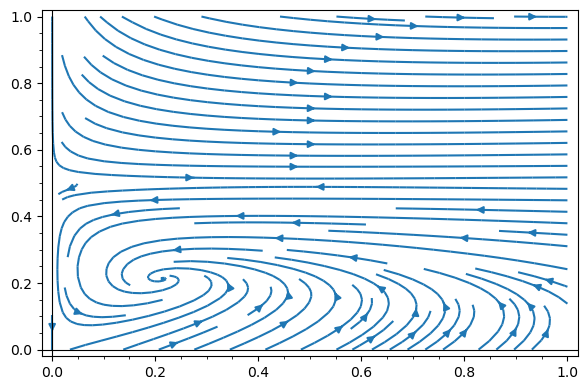

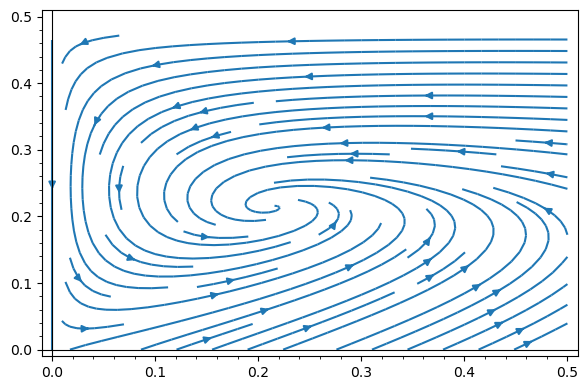

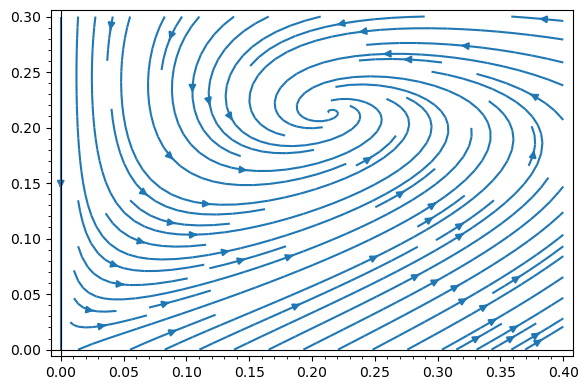

In [6]:
plt1 = streamline_plot((vx,vy),(x,0,1),(y,0,1))
plt2 = streamline_plot((vx,vy),(x,0,.5),(y,0,.5))
plt3 = streamline_plot((vx,vy),(x,0,0.4),(y,0,.3))
show(plt1)
show(plt2)
show(plt3)

## The solutions regular at $r = 0$  
  
Suppose $\rho = \rho_0$ at $r=0$.  Then in the limit $r\rightarrow 0$
$$
m \rightarrow \frac{4}{3}\pi r^3 \rho_0
\qquad
x \rightarrow 4\pi  G r^2 \rho_0
\qquad
y \rightarrow \frac13 x
$$
So all the solutions regular at $r=0$ are on the trajectory that leaves $(0,0)$ along the line $y = \frac13 x$.  
Changing the initial condition $\rho(0)\rightarrow e^{s} \rho(0)$ is expressed by "time" translation along the flow,
$\ln r \rightarrow \ln r + \frac12 s$

'mp.dps = ' 20 '   mp decimal precision = ' 21 '     sage decimal precision = ' 24

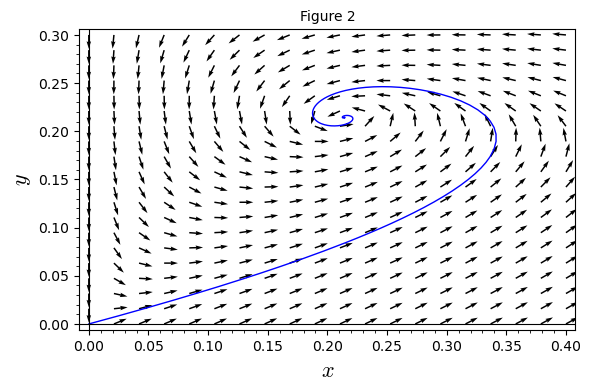

In [7]:
set_precision(20)
ode_tol = None
ode_degree = None
#
t = var('t')
xdot = lambda x,y: x*(2-(1+1/w)*(y+w*x)/(1-2*y))
ydot = lambda x,y: x-y
F = lambda t,y: [xdot(y[0],y[1]), ydot(y[0],y[1])]

t0 = mpf(-7)
F0 =mpf(1)
y0 = mp.exp(2*t0)*F0
y1 = y0/3
traj = mp.odefun(F,t0,[y0,y1],tol=ode_tol,degree=ode_degree)  
#
trajlist0 = [traj(t) for t in mp.linspace(t0,-5,100)]
trajlist1 = [traj(t) for t in mp.linspace(-5,-3.5,100)]
trajlist2 = [traj(t) for t in mp.linspace(-3.5,0,100)]
trajlist3 = [traj(t) for t in mp.linspace(0,5,100)]
trajlist4 = [traj(t) for t in mp.linspace(5,10,100)]
trajplot=list_plot(trajlist0+trajlist1+trajlist2+trajlist3+trajlist4,marker=None,plotjoined=True)
#list_plot(trajlist0+trajlist1+trajlist2+trajlist3+trajlist4,marker='.')
plt=trajplot+vfplot
plt.axes_labels([r"$x$",r"$y$"])
show(plt,title="Figure 2")
#plt.save('Figure_2_vf.pdf',title="Figure 2", dpi=300)

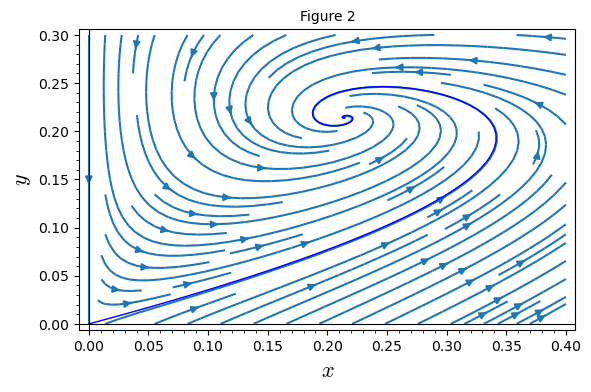

In [8]:
plt=trajplot+plt3
plt.axes_labels([r"$x$",r"$y$"])
show(plt,title="Figure 2")
#plt.save('Figure_2_vf.pdf',title="Figure 2", dpi=300)

## $M$-$R$ star curve  

As the flow approaches the fixed point, $r\rightarrow \infty$ with
$$
\rho \rightarrow \frac{x_\infty}{4\pi G r^2}
\qquad
m \rightarrow \frac{y_\infty r}{G}
$$
The radius and mass are infinite because there is no cutoff at low density.  
  
So introduce a cutoff at $\rho_{min}$.  That is, $\rho$ decreases to $\rho_{min}$ with $p = w \rho$, then for $\rho <\rho_{min}$, $p=0$.  
$$
p = \left \{
\begin{array}{cl}
w \rho & \rho > \rho_{min} \\
0 & \rho \le \rho_{min}
\end{array}
\right.
$$
  
The stellar radius $R$ is given by $\rho(R) = \rho_{min}$.
  
Parametrize the regular trajectory by $t$ with
$$
r \frac{d}{dr} = \frac{d}{dt}
\qquad
\frac{dx}{dt} = 2x
\frac{1-(2+c)y- c wx}{1-2y}
\qquad
\frac{dy}{dt} = x-y
\qquad
c = \frac12 \left(1+\frac{1}{w}\right)
$$
Let $x(t), y(t)$ be the solution of the ode with initial condition
$$
t \rightarrow -\infty \qquad x(t)  \rightarrow e^{2t} \qquad y(t) \rightarrow \frac13 e^{2t}
$$
Write the original change of variables as
$$
\sqrt{4\pi G \rho}\; r = x^{1/2}
\qquad
\sqrt{4\pi G^3 \rho}\;  m= x^{1/2} y
$$
and define dimensionless variables
$$
\hat r = \sqrt{4\pi G \rho_{min}} \; r
\qquad
\hat m = \sqrt{4\pi G^3 \rho_{min}}\;  m
$$
There is a solution with radius $\hat R$ and mass $\hat M$ iff for some $t$
$$
\hat R = x(t)^{1/2}
\qquad
\hat M = x(t)^{1/2} y(t)
$$
So the star curve in the $\hat M$-$\hat R$ plane is
$$
t \mapsto \hat M(t),\hat R(t) = x(t)^{1/2} y(t),\; x(t)^{1/2}
$$
The central density $\rho(0)$ is a function of $t$.
In the limit $t'\rightarrow -\infty$,
$$
\begin{gathered}
r = R e^{t'-t}
\qquad
\sqrt{4\pi G \rho } r = x(t')^{1/2}
\qquad
\sqrt{4\pi G \rho} R e^{t'-t} \rightarrow e^{t'}
\qquad
\sqrt{4\pi G \rho(0)} \frac{\hat R(t)}{\sqrt{4\pi G \rho_{min}}} e^{-t} = 1
\\[1ex]
\rho(0) = \rho_{min} \frac{e^{2t}}{\hat R(t)^2}
\end{gathered}
$$

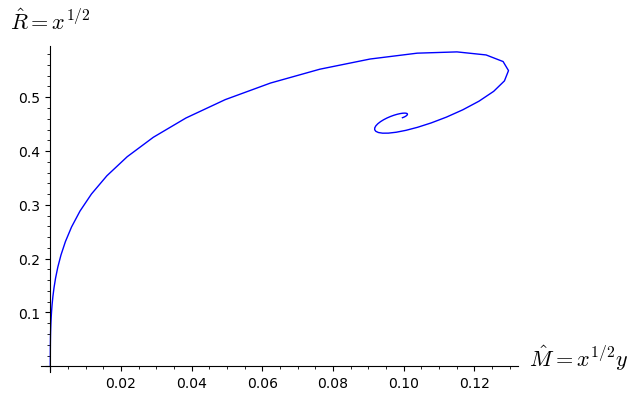

In [9]:
def MR(t):
    [x,y]=traj(t)
    xsqrt = sqrt(x)
    return [xsqrt*y,xsqrt]
MRlist = [MR(t) for t in mp.linspace(t0,5,100)]
plt = list_plot(MRlist,marker=None,plotjoined=True)
plt.axes_labels([r"$\hat M=x^{1/2} y$",r"$\hat R=x^{1/2}$"])
show(plt)

The curve near the fixed point is universal, independent of the low density cutoff.  
Away from the fixed point, the curve depends on the cutoff.